In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.pandas.set_option("display.max_columns",None)        #  To show all columns in a pandas DataFrame

In [3]:
df=pd.read_csv("dataset/shipment.csv")
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


## Data Cleaning

In [4]:
# check null values

df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [5]:
feature_with_na=[features for features in df.columns if df[features].isnull().sum() >=1]
feature_with_na

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Material',
 'Transport',
 'Remote Location']

In [6]:
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),"% missing values")

# more missing values in transport columns

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


In [7]:
# check duplicat values in df
df.duplicated().sum()

# we have no duplicat value in our dataframe/data

0

In [8]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

In [9]:
# seprate the numerical and categorical columns

numeric_features=[feature for feature in df.columns if df[feature].dtype != "O"]
print("number of numeric columns",len(numeric_features))
numeric_features

number of numeric columns 7


['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost']

In [10]:
non_numeric_features=[feature for feature in df.columns if df[feature].dtype == "O"]
print("number of non numeric columns",len(non_numeric_features))
non_numeric_features

number of non numeric columns 13


['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date',
 'Customer Location']

In [11]:
df1=df.copy()
df1.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [12]:
# imputing null values with median
for i in numeric_features:
    df1[i].fillna(df1[i].median(),inplace=True)

In [13]:
df1[numeric_features].isnull().sum()       # no missing value in numerical features

Artist Reputation      0
Height                 0
Width                  0
Weight                 0
Price Of Sculpture     0
Base Shipping Price    0
Cost                   0
dtype: int64

### Multicollinearity check

In [14]:
# variance inflation factor

import statsmodels.api as sm

for i in range(0,len(numeric_features)):
    x=df1.iloc[:,df1.columns==numeric_features[i]]
    y=df1.Cost
    model=sm.OLS(x,y)
    result=model.fit()
    rsq=result.rsquared
    vif=round(1/(1-rsq),2)
    print("variance inflation factor of {}  columns is {} \n".format(numeric_features[i],vif))


# all VIF is approx 1 so there is no severe multicolinearity

variance inflation factor of Artist Reputation  columns is 1.01 

variance inflation factor of Height  columns is 1.01 

variance inflation factor of Width  columns is 1.02 

variance inflation factor of Weight  columns is 1.2 

variance inflation factor of Price Of Sculpture  columns is 1.3 

variance inflation factor of Base Shipping Price  columns is 1.01 

variance inflation factor of Cost  columns is inf 



In [15]:
# Note --> when VIF > 10 then the multicollinearity exists

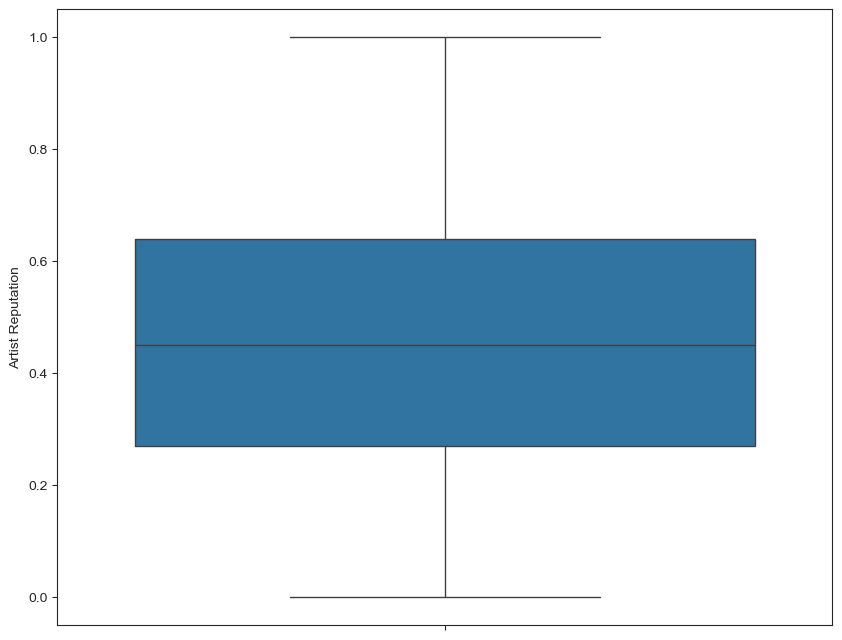

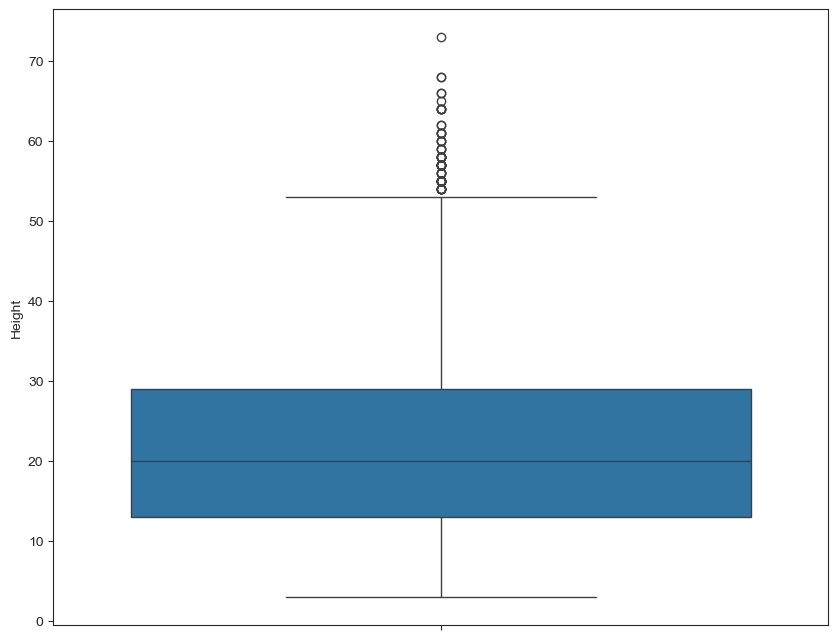

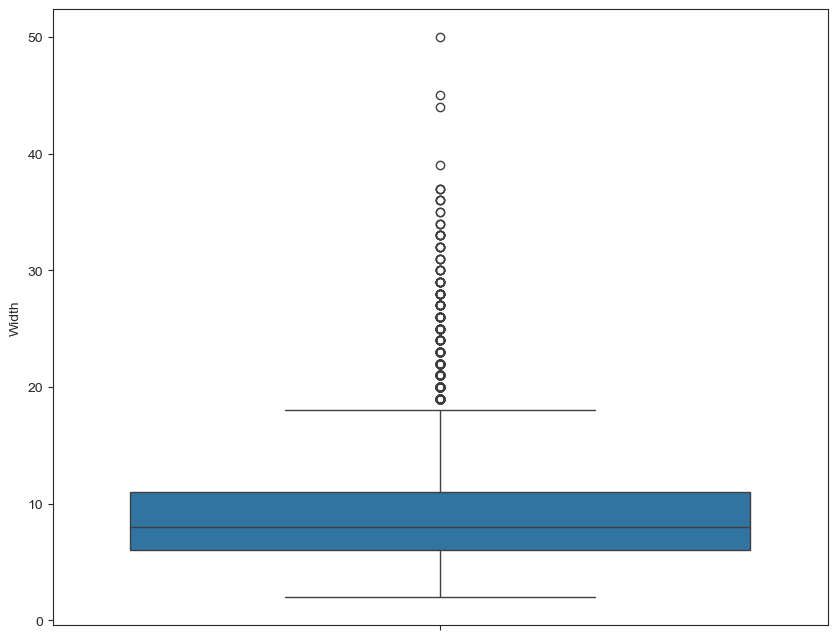

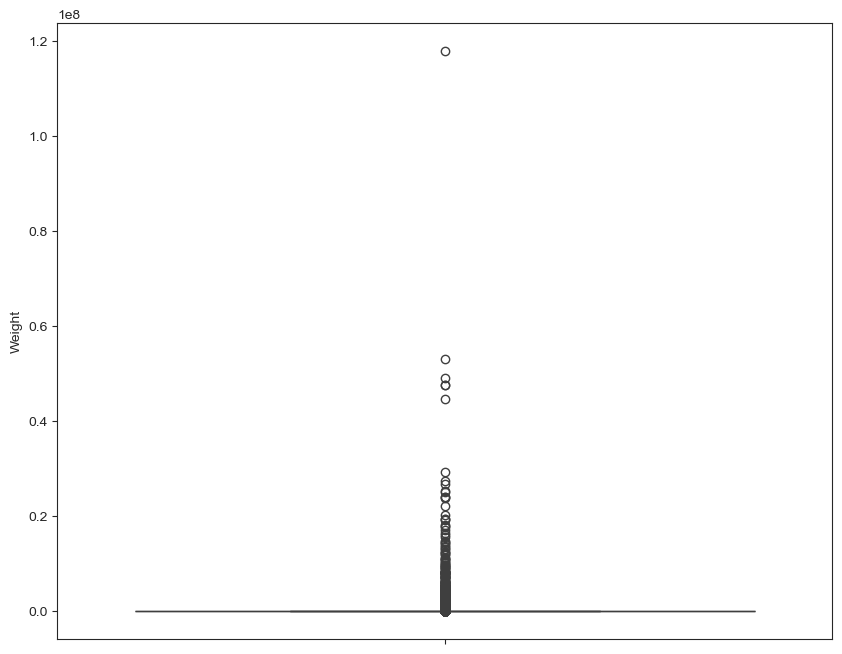

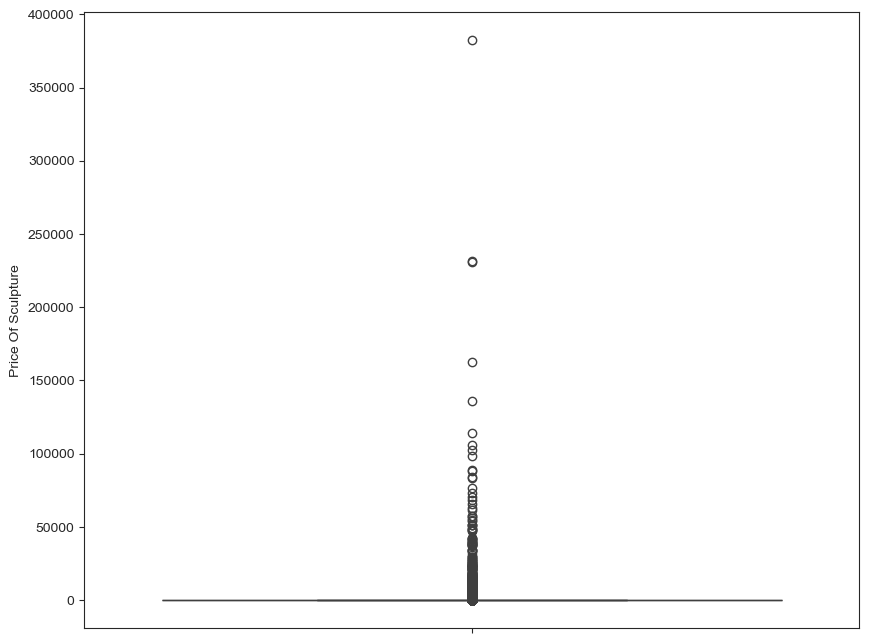

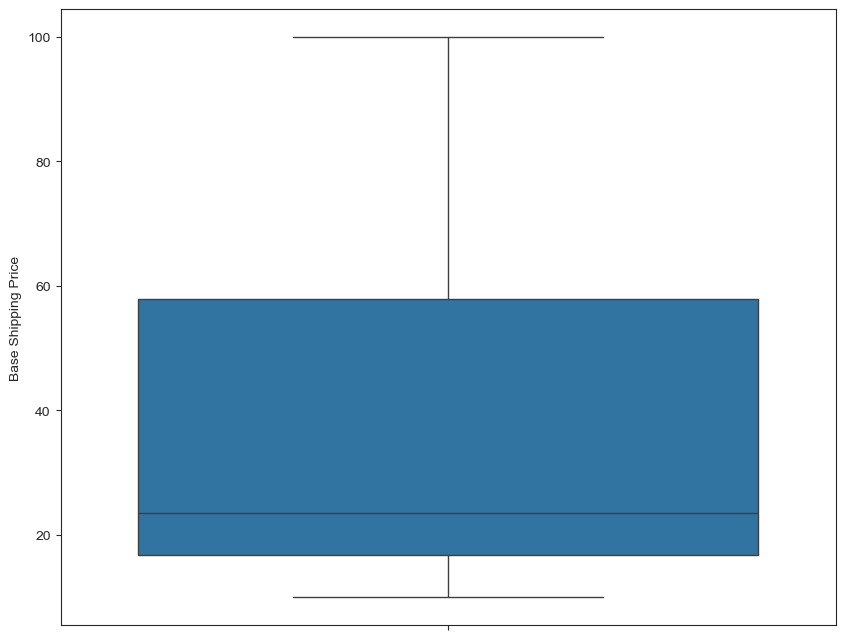

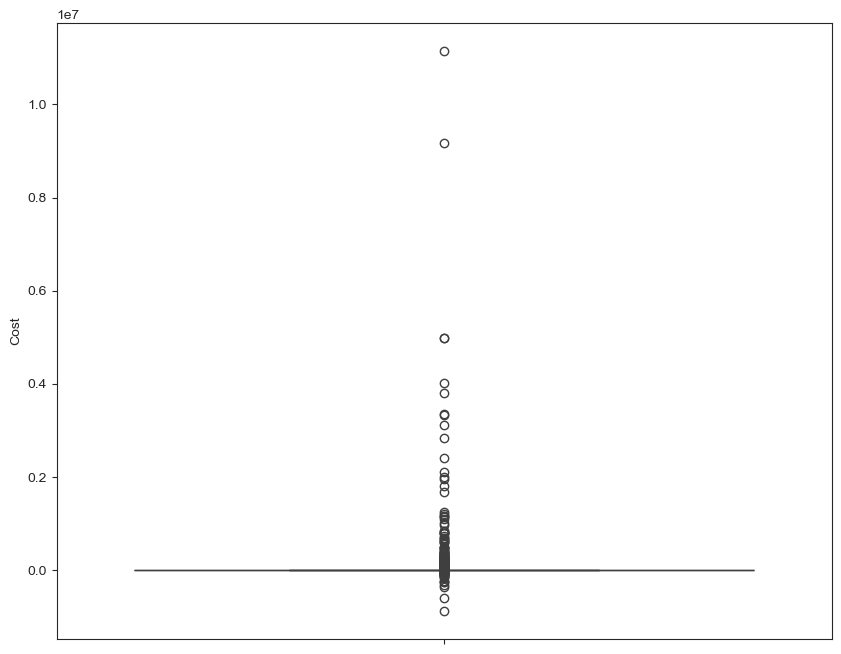

In [16]:
for i in numeric_features:
    plt.figure(figsize=(10,8))
    sns.set_style("ticks")
    ax=sns.boxplot(df1[i])

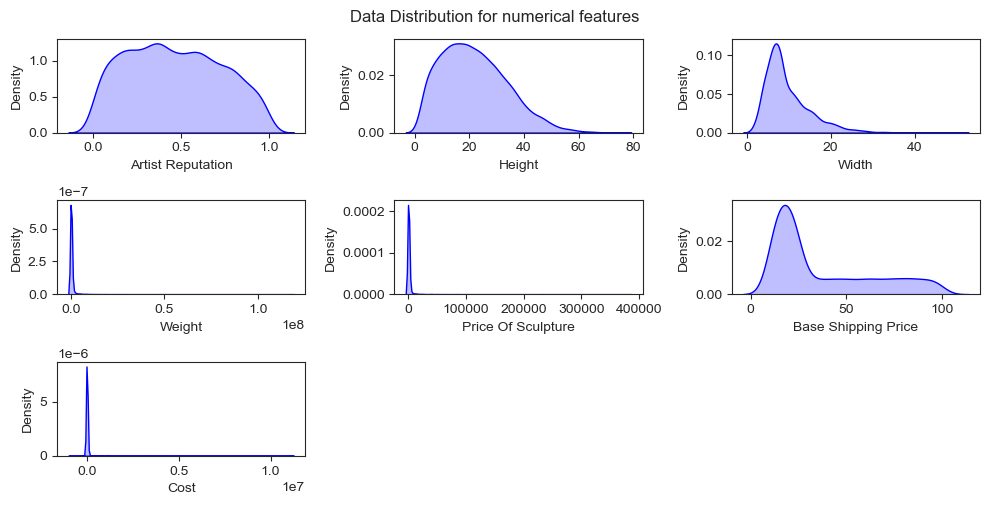

In [17]:
plt.figure(figsize=(10,8))
plt.suptitle("Data Distribution for numerical features")

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color="b")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [18]:
#skewness
df[numeric_features].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
Cost                   29.817459
dtype: float64

In [19]:
# appy powertransformer for remove skewness

In [20]:
outlier_feature=["Price Of Sculpture","Weight"]

In [21]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(standardize=False)

outlier_data=df1[outlier_feature]

In [22]:
df1[outlier_feature]=pt.fit_transform(df1[outlier_feature])

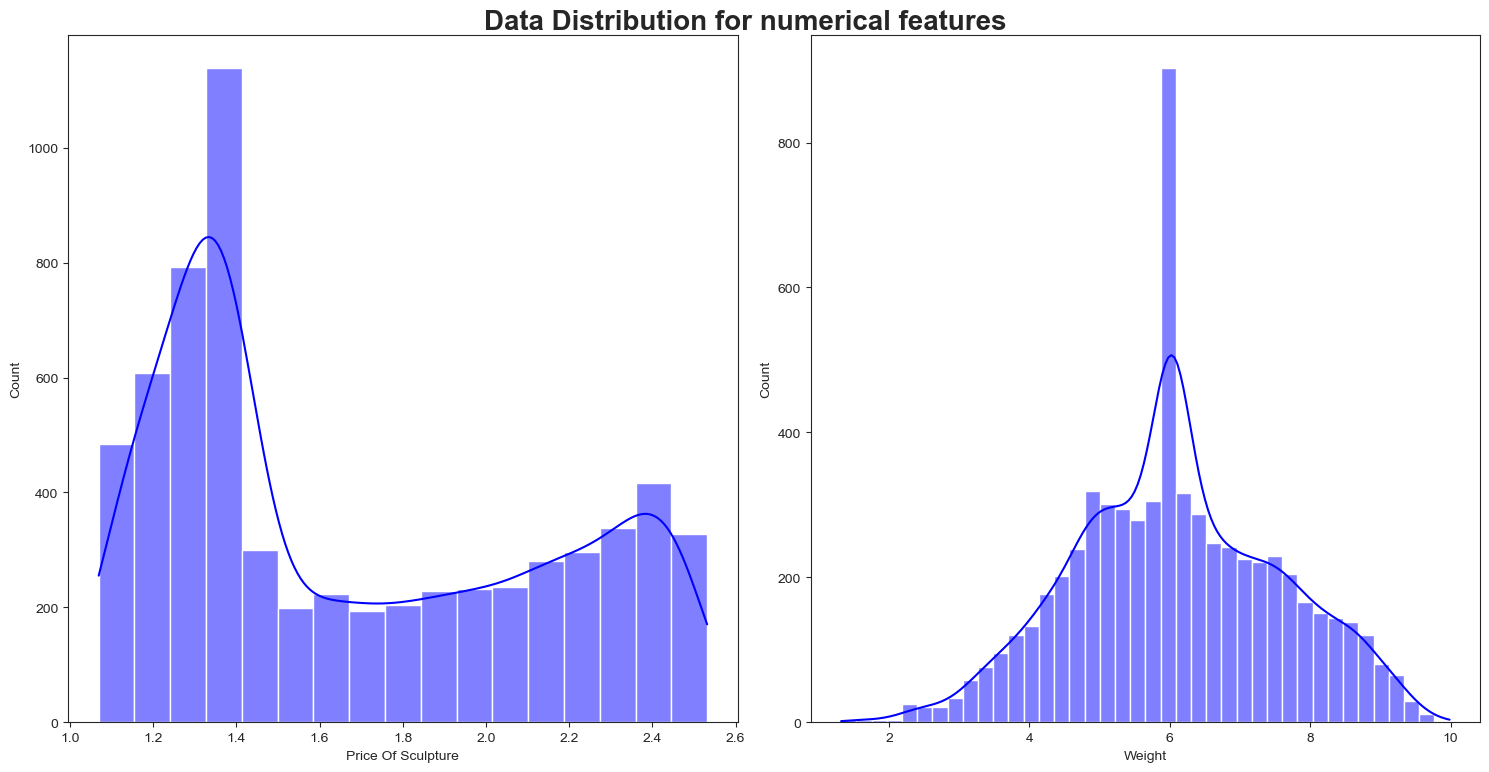

In [23]:
plt.figure(figsize=(15,15))
plt.suptitle("Data Distribution for numerical features",fontweight='bold',fontsize='20')

for i in range(0,len(outlier_feature)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df1[outlier_feature[i]],color='b',kde=True)
    plt.xlabel(outlier_feature[i])
    plt.tight_layout()
    # plt.show()

In [24]:
df1[outlier_feature].skew()          # after powertransforemer apply

# note --> power transformer does a better job overcoming skewness and handle the missing value

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

In [25]:
outlier_data[outlier_feature].skew()         # before

Price Of Sculpture    22.206823
Weight                22.574798
dtype: float64

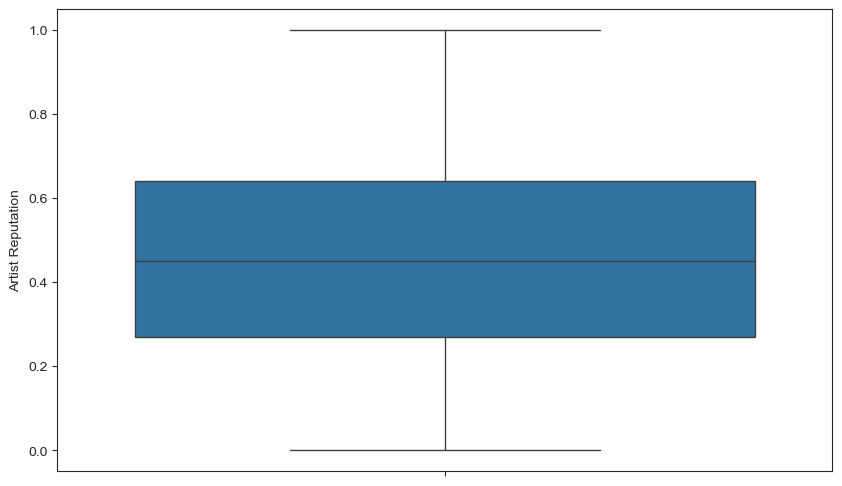

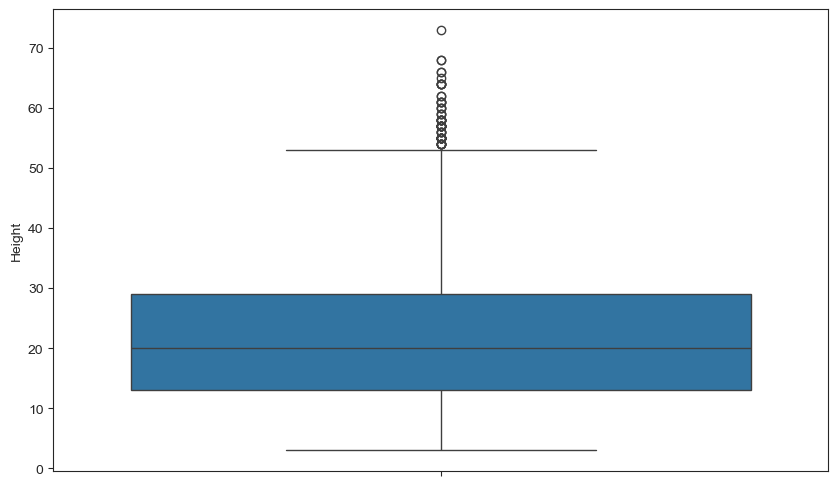

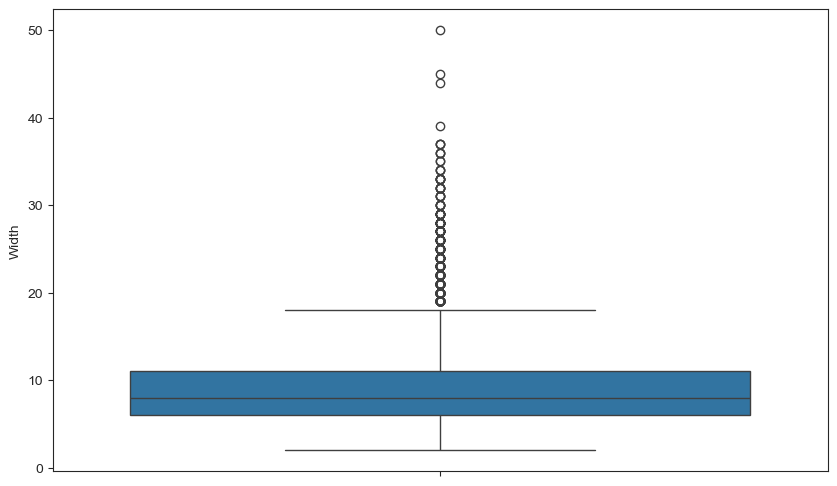

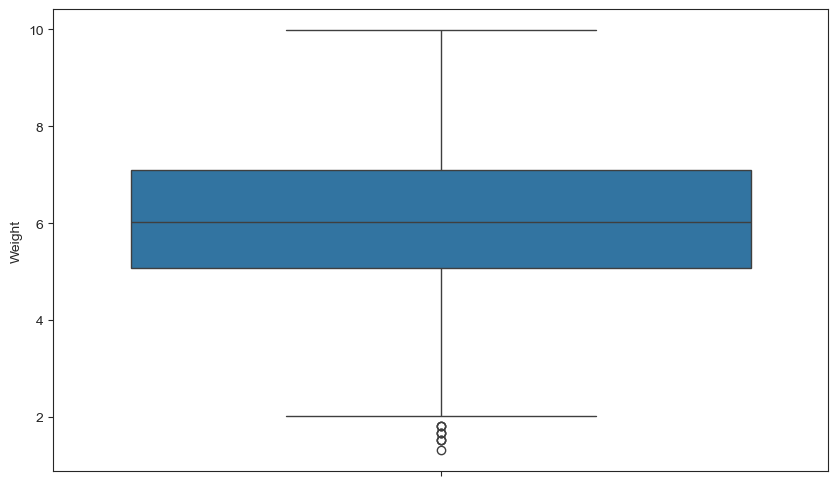

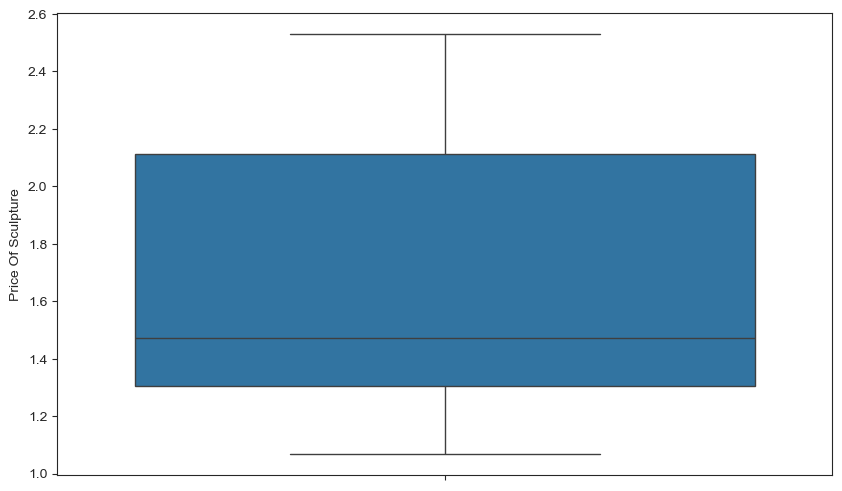

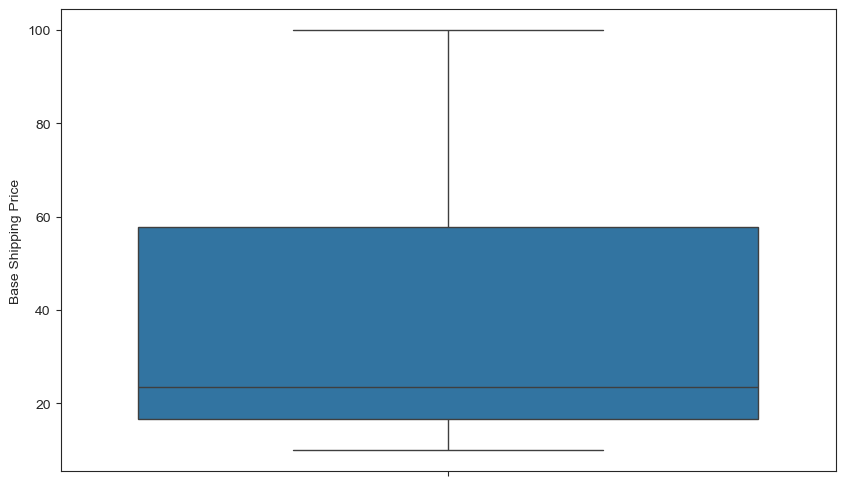

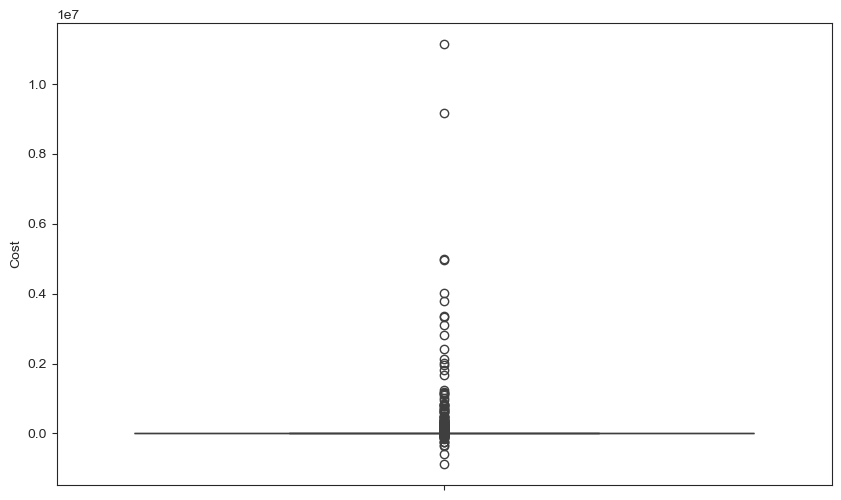

In [26]:
for i in numeric_features:
    plt.figure(figsize=(10,6))
    sns.set_style("ticks")
    ax=sns.boxplot(df1[i])

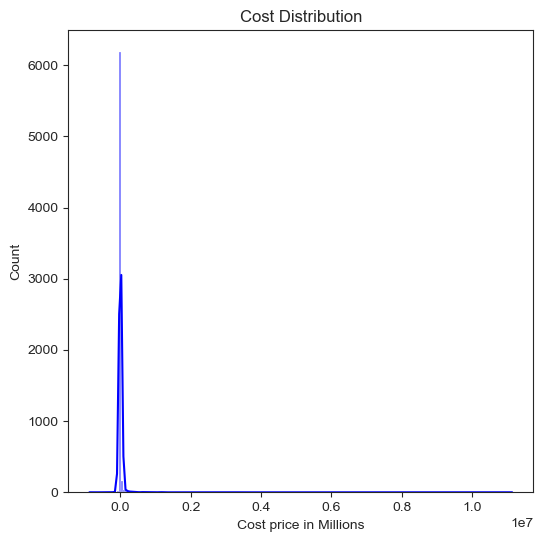

In [27]:
plt.figure(figsize=(6,6))
sns.histplot(df1['Cost'],bins=200,kde=True,color='b')
plt.title("Cost Distribution")
plt.ylabel("Count")
plt.xlabel("Cost price in Millions")
plt.show()

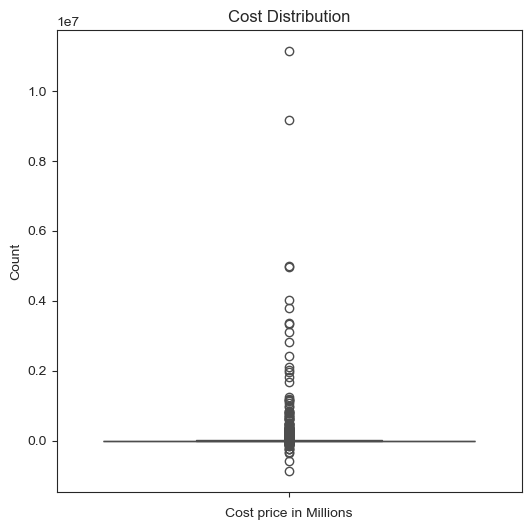

In [28]:
plt.figure(figsize=(6,6))
sns.boxplot(df1['Cost'],color='b')
plt.title("Cost Distribution")
plt.ylabel("Count")
plt.xlabel("Cost price in Millions")
plt.show()

In [29]:
# apply log transformation on the cost columns

df1['Cost']=np.log1p(df1['Cost'])

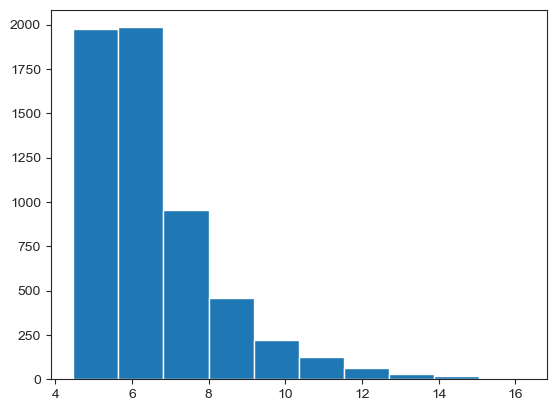

In [30]:
plt.hist(df1['Cost'])
plt.show()

In [31]:
df1['Scheduled Date']=pd.to_datetime(df1['Scheduled Date'])
df1['Delivery Date']=pd.to_datetime(df1['Delivery Date'])

In [35]:
df1.dtypes

Customer Id                      object
Artist Name                      object
Artist Reputation               float64
Height                          float64
Width                           float64
Weight                          float64
Material                         object
Price Of Sculpture              float64
Base Shipping Price             float64
International                    object
Express Shipment                 object
Installation Included            object
Transport                        object
Fragile                          object
Customer Information             object
Remote Location                  object
Scheduled Date           datetime64[ns]
Delivery Date            datetime64[ns]
Customer Location                object
Cost                            float64
dtype: object

In [38]:
df1['Month']=pd.to_datetime(df1['Scheduled Date']).dt.month
df1['Year']=pd.to_datetime(df1['Delivery Date']).dt.year

In [42]:
df1.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Month,Year
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,6.179735,Brass,1.665666,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",NaN,6,2015
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,3.545661,Brass,1.411891,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",NaN,3,2017
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,4.482071,Clay,1.283450,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",NaN,3,2015
3,fffe350031003300,Robert Chaires,0.12,9.0,8.0,6.025789,Aluminium,1.347919,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",NaN,5,2015
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,4.685718,Aluminium,1.094532,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",NaN,12,2016


In [43]:
df1.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost', 'Month',
       'Year'],
      dtype='object')

In [44]:
drop_columns=['Customer Id','Artist Name','Customer Location','Scheduled Date','Delivery Date']

In [45]:
df1.drop(columns=drop_columns,inplace=True)

In [46]:
df1.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Month,Year
0,0.26,17.0,6.0,6.179735,Brass,1.665666,16.27,Yes,Yes,No,Airways,No,Working Class,No,NaN,6,2015
1,0.28,3.0,3.0,3.545661,Brass,1.411891,15.00,No,No,No,Roadways,No,Working Class,No,NaN,3,2017
2,0.07,8.0,5.0,4.482071,Clay,1.283450,21.18,No,No,No,Roadways,Yes,Working Class,Yes,NaN,3,2015
3,0.12,9.0,8.0,6.025789,Aluminium,1.347919,16.31,No,No,No,NaN,No,Wealthy,Yes,NaN,5,2015
4,0.15,17.0,6.0,4.685718,Aluminium,1.094532,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,NaN,12,2016


In [48]:
# !pip install scikit-learn

In [55]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,LabelEncoder,OrdinalEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [54]:
# pip install catboost

In [56]:
# Split X and y
X=df1.drop(columns=['Cost'],axis=1)
y=np.abs(df['Cost'])                  # positive value convert

In [58]:
print(y.skew())
y=np.log1p(y)           # overcoming the skewness
y.skew()

29.86640618935751


1.7668615626230282

In [63]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
X_train.shape,y_train.shape,df1.shape

((5200, 16), (5200,), (6500, 17))

In [72]:
X_train

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Month,Year
889,0.00,4.0,4.0,3.416028,Clay,1.261118,19.42,No,No,Yes,Airways,Yes,Working Class,No,6,2017
4385,0.62,31.0,7.0,5.955687,Clay,1.523889,19.05,No,No,No,Roadways,Yes,Working Class,No,4,2016
4919,0.37,18.0,9.0,8.034224,Stone,2.379536,90.95,No,Yes,No,Roadways,No,Wealthy,No,10,2015
4794,0.49,7.0,8.0,6.285954,Stone,1.564581,70.65,No,Yes,Yes,NaN,No,Wealthy,NaN,1,2019
5438,0.40,26.0,10.0,6.853663,Brass,1.804088,57.78,No,No,No,Airways,No,Working Class,No,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.16,9.0,5.0,3.773925,NaN,1.315283,22.25,No,No,No,Airways,No,Working Class,Yes,1,2015
5191,0.06,5.0,4.0,2.791775,Wood,1.400294,17.88,No,No,Yes,Roadways,No,Working Class,No,9,2018
5226,0.12,22.0,10.0,7.058153,Brass,1.716811,68.25,No,No,No,Roadways,No,Working Class,No,11,2016
5390,0.19,20.0,7.0,7.788760,Stone,2.109675,26.96,No,No,No,Waterways,No,Working Class,No,2,2017


In [73]:
X_test

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Month,Year
3106,0.70,21.0,13.0,5.896826,Clay,1.603040,17.84,No,No,Yes,NaN,Yes,Working Class,No,7,2016
6161,0.14,15.0,8.0,4.689680,Aluminium,1.394937,22.83,No,No,Yes,Roadways,No,Working Class,No,4,2018
1867,0.69,19.0,7.0,4.462305,Wood,1.411891,23.71,No,No,No,Waterways,No,Working Class,No,4,2018
3238,0.52,11.0,6.0,6.942416,NaN,1.852931,63.68,Yes,No,No,NaN,No,Working Class,No,1,2017
5509,0.45,11.0,8.0,4.852782,Clay,1.105306,16.42,No,No,Yes,Roadways,Yes,Working Class,No,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,0.25,12.0,8.0,4.842181,Aluminium,1.197437,18.80,No,No,Yes,Roadways,No,Wealthy,No,7,2018
1608,0.67,17.0,9.0,6.528088,Brass,1.943833,97.67,No,Yes,Yes,NaN,No,Working Class,NaN,11,2015
2191,0.90,13.0,7.0,5.297334,Clay,1.333074,22.93,Yes,No,Yes,Waterways,Yes,Working Class,No,1,2016
624,0.45,25.0,7.0,6.722678,Brass,1.454949,69.06,No,No,No,NaN,No,Working Class,No,1,2015


In [83]:
numeric_features=[x for x in numeric_features[:-1] if x not in outlier_feature]
categorical_features=[x for x in non_numeric_features if x not in drop_columns]

print((numeric_features),(categorical_features),(outlier_feature))

['Artist Reputation', 'Height', 'Width'] ['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location'] ['Price Of Sculpture', 'Weight']


In [84]:
numeric_feature_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ("scaler",RobustScaler())
])

categorical_feature_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoding",OneHotEncoder())
])

outlier_feature_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="median")),
    ("transformer",PowerTransformer(standardize=True))
])

preprocessor=ColumnTransformer(
    [
        ("numerical pipeliine",numeric_feature_pipeline,numeric_features),
        ("categorical feature pipeline",categorical_feature_pipeline,categorical_features),
        ("outliers feature pipeline",outlier_feature_pipeline,outlier_feature)
    ]
)

In [85]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [90]:
models={
    "linear regressor":LinearRegression(),
    "k - neighbours regressor":KNeighborsRegressor(),
    "Decision tree regressor":DecisionTreeRegressor(),
    "random forest regressor":RandomForestRegressor(),
    "XGBoostregressor":XGBRegressor(),
    "Catboosting regressor":CatBoostRegressor(),
    "Adaboost regressor":AdaBoostRegressor(),
    "SVR":SVR()
    
}

In [91]:
def evaluate_reg(true,predicted):
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(true,predicted)
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square
    

In [112]:
def evaluate_models(X_train,X_test,y_train,y_test,models):
    model_list=[]
    r2_list=[]
    for i in range(len(models)):
        model=list(models.values())[i]
        # model train
        model.fit(X_train,y_train)

        # model prediction
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)

        # evaluate model
        model_train_mae,model_train_rmse,model_train_r2=evaluate_reg(y_train,y_train_pred)
        model_test_mae,model_test_rmse,model_test_r2=evaluate_reg(y_test,y_test_pred)


        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        
        print("Model performance on training dataset")
        print("Root Mean Square : ",model_train_rmse)
        print("Mean Absolute Error : ",model_train_mae)
        print("R2 square : ",model_train_r2)

        print("----------------------------------------------------------")

        print("Model performance on testing dataset")
        print("Root Mean Square : ",model_test_rmse)
        print("Mean Absolute Error : ",model_test_mae)
        print("R2 square : ",model_test_r2)
        r2_list.append(model_test_r2)
        
        print("="*35)
        print("\n")
        
    report=pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","r2_score"]).sort_values(by=["r2_score"],ascending=False)
    return report  

In [113]:
base_report=evaluate_models(X_train,X_test,y_train,y_test,models)

linear regressor
Model performance on training dataset
Root Mean Square :  0.7916251450660416
Mean Absolute Error :  0.544669373272943
R2 square :  0.7700908796811399
----------------------------------------------------------
Model performance on testing dataset
Root Mean Square :  0.7480705640993919
Mean Absolute Error :  0.5282576584504113
R2 square :  0.7944362853453152


k - neighbours regressor
Model performance on training dataset
Root Mean Square :  0.5892422996783198
Mean Absolute Error :  0.3776686177264859
R2 square :  0.872618936611396
----------------------------------------------------------
Model performance on testing dataset
Root Mean Square :  0.6622724716334555
Mean Absolute Error :  0.431669017737037
R2 square :  0.8388854614829556


Decision tree regressor
Model performance on training dataset
Root Mean Square :  0.0
Mean Absolute Error :  0.0
R2 square :  1.0
----------------------------------------------------------
Model performance on testing dataset
Root Mean S

In [115]:
base_report

,Model Name,r2_score
5,Catboosting regressor,0.962297
4,XGBoostregressor,0.954969
3,random forest regressor,0.949687
2,Decision tree regressor,0.896368
7,SVR,0.890713
6,Adaboost regressor,0.860929
1,k - neighbours regressor,0.838885
0,linear regressor,0.794436


In [ ]:
# We select Catboosting regressor model 